**Phân cụm dữ liệu**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

K-mean

In [3]:
df_processed = pd.read_csv("../data/processed/data_processed.csv")

y = df_processed['Class/ASD']
X = df_processed.drop('Class/ASD', axis=1)

Chọn số cụm k

Vì dữ liệu của bạn có 2 lớp (0 & 1), ta thử bắt đầu với k = 2.

Để kiểm tra xem k=2 có hợp lý không → dùng Elbow Method:

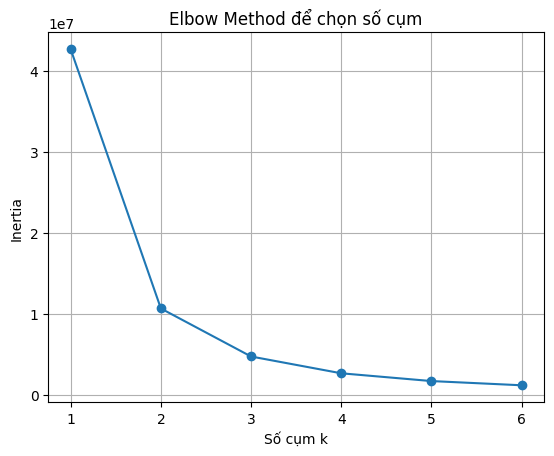

In [4]:
inertias = []
K = range(1, 7)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel("Số cụm k")
plt.ylabel("Inertia")
plt.title("Elbow Method để chọn số cụm")
plt.grid(True)
plt.show()

“khuỷu tay” xuất hiện tại k = 2 → dùng k=2 là hợp lý.

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

đánh giá xem phân cụm có tốt hay không → dùng Silhouette Score:

In [8]:
sil_score = silhouette_score(X, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.6255074743117396


So sánh phân cụm với nhãn thật (đầu ra)

In [9]:
comparison = pd.crosstab(y, clusters, rownames=['Class/ASD'], colnames=['Cluster'])
print(comparison)

Cluster      0    1
Class/ASD          
0          319  320
1           81   80


Trực quan hóa mối quan hệ của một số chiều dữ liệu chính với đầu ra để xem xét khả năng có
tương quan hay hình thành cụm dữ liệu.

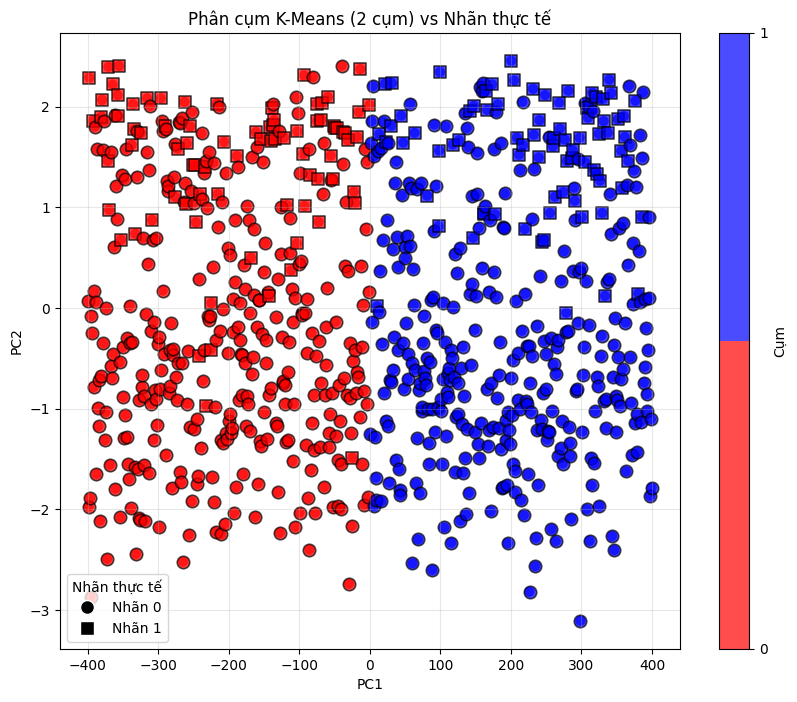

In [7]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X)

plt.figure(figsize=(10, 8))


from matplotlib.colors import ListedColormap
colors = ['red', 'blue']  
cmap_binary = ListedColormap(colors)


scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], 
                     c=clusters, cmap=cmap_binary,
                     alpha=0.7, s=60, 
                     edgecolors='white', linewidth=0.5)

for i in range(len(X_vis)):
    current_color = colors[clusters[i]] 
    plt.scatter(X_vis[i, 0], X_vis[i, 1], 
                marker='o' if y[i] == 0 else 's',
                color=current_color,
                edgecolors='black',
                s=80, alpha=0.7, linewidth=1.2) 

plt.colorbar(scatter, label='Cụm', ticks=[0, 1])
plt.title("Phân cụm K-Means (2 cụm) vs Nhãn thực tế")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.3)

# Tạo legend cho nhãn thực tế
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                  markerfacecolor='black', markersize=10, label='Nhãn 0'),
                  plt.Line2D([0], [0], marker='s', color='w', 
                  markerfacecolor='black', markersize=10, label='Nhãn 1')]
plt.legend(handles=legend_elements, title='Nhãn thực tế')

plt.show()